Criminal Investigation Project - Phone Call Tracing


Purpose of this project is to understand how to manipulate data using the pandas library.


1.2.1 - highest frequency count

In [71]:
#load in pandas
import pandas as pd
calls = pd.read_excel(r'phone_data.xlsx')
high = calls.groupby(['Call type'])
outgoing = high.get_group('Outgoing')
out = outgoing.groupby(['Number called (to/from)']).size().sort_values(ascending=False).head(3).rename_axis('Phone Number').to_frame('# outgoing calls')
display(out)

,# outgoing calls
Phone Number,
A_1,111
A_5,48
B_3,28


1.2.2 - lowest frequency count

In [72]:
low_calls = outgoing.groupby(['Number called (to/from)']).size().sort_values(ascending=True).head(14).rename_axis('Phone Number').to_frame('# outgoing calls')
display(low_calls)

,# outgoing calls
Phone Number,
D_1,1
F_5,1
F_4,1
F_3,1
F_2,1
F_1,1
E_5,1
E_4,1
D_5,1


1.3.1 - sort by duration of call

In [73]:
long_time = outgoing.groupby(['Number called (to/from)'])['Duration'].sum().sort_values(ascending=False).head(3).rename_axis('Phone Number').to_frame('total duration')
display(long_time)

short_time = outgoing.groupby(['Number called (to/from)'])['Duration'].sum().sort_values(ascending=True).head(14).rename_axis('Phone Number').to_frame('total duration')
display(short_time)

,total duration
Phone Number,
A_1,1146
A_5,427
A_4,96


,total duration
Phone Number,
E_5,1
E_4,1
D_5,1
C_1,1
D_1,2
A_2,2
B_1,2
D_4,2
D_2,2


1.4.1 - sort by count from location

In [74]:
loc = outgoing.groupby(['From city']).size().rename_axis('City').to_frame('# outgoing calls')
loc2 = outgoing.groupby(['To city']).size().rename_axis('City').to_frame('# incoming calls')
display(loc, loc2)

,# outgoing calls
City,
CLAREMONT ON,1
NEWMARKET ON,2
TORONTO ON,244


,# incoming calls
City,
800 SERV SERV 800 ON,1
866 SERV SERV 866 ON,1
877 SERV SERV 877 ON,1
888 SERV SERV 888 ON,1
AURORA ON,1
NEWMARKET ON,1
OAK RIDGES ON,28
RICHMONDHL ON,10
STOUFFVL ON,1


1.5.1 - collecting the total duration of calls per month

In [75]:
from datetime import datetime

incoming = high.get_group('Incoming')
#removing any whitespace
calls['Date'] = calls['Date'].str.strip()
#converting data into datetime to extract month
calls['Date'] = pd.to_datetime(calls['Date'], format = '%m-%d-%Y')
calls['Month'] = calls['Date'].dt.month

location = calls.pivot_table(index = 'Month', columns = 'Call type', values = 'Duration', aggfunc = 'sum')
display(location)

Call type,Incoming,Outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


1.5.2 - visualization of incoming and outgoing calls

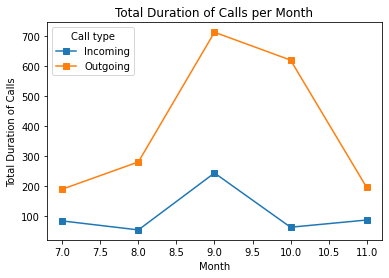

In [76]:
import matplotlib.pyplot as plt
location.plot(kind = 'line', marker = 's')
plt.ylabel("Total Duration of Calls")
plt.title("Total Duration of Calls per Month")
plt.show()

1.5.3 - interpretation of results

There is a large volume of call duration happening (incoming and outgoing) in September. Most of the calls happened in Toronto and the top outgoing phone number had 111 calls with a total duration of 1146 mins. This is around 11 mins per call and it seems unlikely for this volume of calls to be on a personal phone. The sudden spike of calls in September signifies that there was some type of activity happening that required constant communication (i.e. criminal activities).

1.6 - histogram plot of outgoing calls

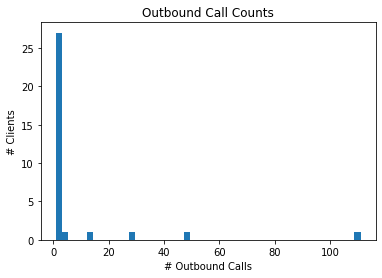

In [77]:
long_time_x = outgoing.groupby(['Number called (to/from)']).size()
plt.hist(long_time_x, bins = 50)
plt.xlabel("# Outbound Calls")
plt.ylabel("# Clients")
plt.title("Outbound Call Counts")
plt.show()

## Modelling an ergodicity problem

### Explanation:

""Starting with an initial wealth of 100$, you engage into a simple coin-flipping game in which
your wealth increases by 50% every time you flip heads and you lose 40% if you flip tails.
Since tossing heads or tails is just as likely, it makes sense to accept such a game if you play
enough times because your potential gain is larger than your potential loss each time you
play. Yet, as we will see this is a paradox.""

2.3.1 - initializing the coin flips

In [78]:
from random import random
import numpy as np
n = 100
w = 100
random_flip = np.random.rand(n,w)
rand_frame = pd.DataFrame(random_flip)
rand_frame = rand_frame.add_prefix('prob_')


2.3.2 - initializing the different paths

In [79]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
for x in range (0,w):
    rand_frame['balance_'+ str(x)] = 100

2.3.3 - updating the dataframe according to the constraints

In [80]:
for row in range(1,n):
    for col in range(0,w):
        if rand_frame.loc[row-1, 'prob_'+ str(col)] >= 0.5:
            rand_frame.loc[row, 'balance_'+ str(col)] = 1.5*rand_frame.loc[row-1,'balance_'+ str(col)]
        elif rand_frame.loc[row-1, 'prob_'+ str(col)] < 0.5:
            rand_frame.loc[row, 'balance_'+ str(col)] = 0.6*rand_frame.loc[row-1,'balance_'+ str(col)]

2.3.4 - plotting the time trajectories of all paths

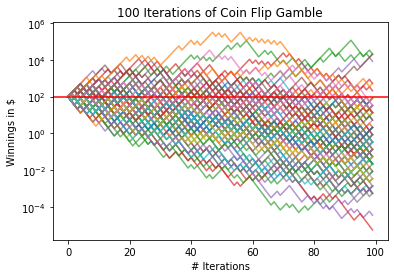

,balance_2,balance_33,balance_43,balance_54,balance_62,balance_75,balance_91
99,20479.262699,209.70765,524.269125,8191.70508,20479.262699,20479.262699,524.269125


There are 7 gamblers with more than $100 at t = 100


In [81]:
#visualizing the 100 iterations
new_rand = rand_frame.iloc[:, w:2*w]
new_rand.plot(legend= None, alpha = 0.7, logy = True)
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("100 Iterations of Coin Flip Gamble")
plt.show()
over_100_1 = new_rand.loc[[99]][new_rand > 100]
over_100_1 = over_100_1.dropna(axis = 1, how = 'any')
display(over_100_1)
print("There are "+str(over_100_1.shape[1])+" gamblers with more than $100 at t = 100")



In [82]:
#initializing the 1000 iterations as another dataframe
N = 1000
new_new_rando = np.random.rand(N,w)
new_new_frame = pd.DataFrame(new_new_rando)
new_new_frame = new_new_frame.add_prefix('prob_')
for x in range (0,w):
    new_new_frame['balance_'+ str(x)] = 100
for row in range(1,N):
    for col in range(0,w):
        if new_new_frame.loc[row-1, 'prob_'+ str(col)] >= 0.5:
            new_new_frame.loc[row, 'balance_'+ str(col)] = 1.5*new_new_frame.loc[row-1,'balance_'+ str(col)]
        elif new_new_frame.loc[row-1, 'prob_'+ str(col)] < 0.5:
            new_new_frame.loc[row, 'balance_'+ str(col)] = 0.6*new_new_frame.loc[row-1,'balance_'+ str(col)]

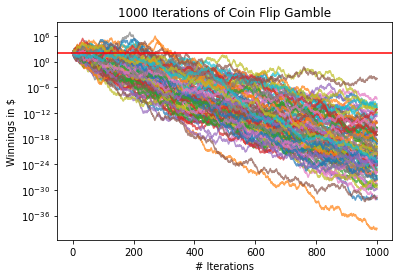

,balance_25,balance_34,balance_37,balance_40,balance_44,balance_51,balance_59,balance_60,balance_63,balance_75,balance_77,balance_87,balance_91,balance_98
99,524.269125,1310.672813,3276.682032,209.70765,209.70765,51198.156747,8191.70508,127995.391869,209.70765,3276.682032,209.70765,3276.682032,3276.682032,1310.672813


There are 14 gamblers with more than $100 at t = 1000
When N increases to 1000, the downward trend stated from the paper can be observed with any randomly generated data following the calculation logic.


In [83]:
#plotting the 1000 iterations
new_new_rand = new_new_frame.iloc[:, w:2*w]
new_new_rand.plot(legend = None, logy = True, alpha = 0.7)
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("1000 Iterations of Coin Flip Gamble")
plt.show()
over_100_2 = new_new_rand.loc[[99]][new_new_rand > 100]
over_100_2 = over_100_2.dropna(axis = 1, how = 'any')
display(over_100_2)
print("There are "+str(over_100_2.shape[1])+" gamblers with more than $100 at t = 1000")
print("When N increases to 1000, the downward trend stated from the paper can be observed with any randomly generated data following the calculation logic.")


2.3.5 - plotting the change in the mean and median of the experiment

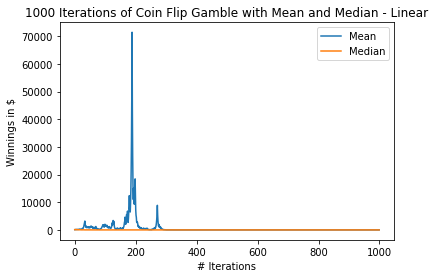

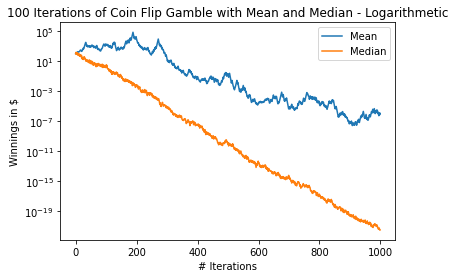

Using a logarithmetic y-axis better describes the data as it allows the reader to see that the trend of the experiment is downwards. Using a linear y-axis shows the spikes that could potentially happen in the middle of the experiment but not the overall trend. However, the linear y-axis still shows that the max winning value will decrease over time as t approaches 1000.
The median of the linear y-axis shows that the majority of the data lies very low and not representative of the mean. The logarithmetic y-axis shows that the median is decreasing in a log manner as the trend is linear on a log scale.


In [84]:
colavg = new_new_rand.mean(axis = 1)
colmed = new_new_rand.median(axis = 1)
#plotting with linear y axis
data_1000 = pd.DataFrame({'Mean': colavg, 'Median': colmed})
data_1000.plot()
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("1000 Iterations of Coin Flip Gamble with Mean and Median - Linear")
plt.legend()
plt.show()
#plotting with logarithmic y axis
data_1000.plot(logy = True)
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("100 Iterations of Coin Flip Gamble with Mean and Median - Logarithmetic")
plt.legend()
plt.show()

print("Using a logarithmetic y-axis better describes the data as it allows the reader to see that the trend of the experiment is downwards. Using a linear y-axis shows the spikes that could potentially happen in the middle of the experiment but not the overall trend. However, the linear y-axis still shows that the max winning value will decrease over time as t approaches 1000.")
print("The median of the linear y-axis shows that the majority of the data lies very low and not representative of the mean. The logarithmetic y-axis shows that the median is decreasing in a log manner as the trend is linear on a log scale.")

### Following are repeat of the same experiment but 1000 gamblers

2.3.6.3

In [85]:
N = 10
w = 1000
n_rando = np.random.rand(N,w)
n_frame = pd.DataFrame(n_rando)
n_frame = n_frame.add_prefix('prob_')
for x in range (0,w):
    n_frame['balance_'+ str(x)] = 100
for row in range(1,N):
    for col in range(0,w):
        if n_frame.loc[row-1, 'prob_'+ str(col)] >= 0.5:
            n_frame.loc[row, 'balance_'+ str(col)] = 50 + n_frame.loc[row-1,'balance_'+ str(col)]
        elif n_frame.loc[row-1, 'prob_'+ str(col)] < 0.5:
            n_frame.loc[row, 'balance_'+ str(col)] = n_frame.loc[row-1,'balance_'+ str(col)] - 40

2.3.6.4

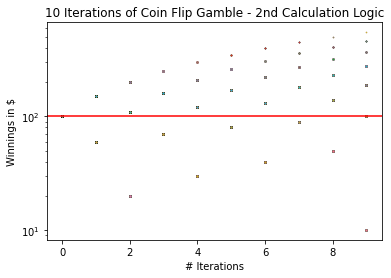

There are 508 gamblers with more than $100 at t = 10


In [86]:
n_rand = n_frame.iloc[:, w:2*w]
n_rand.plot(legend = None, ls = 'None', marker = 'o', markersize = 0.5, logy = True)
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("10 Iterations of Coin Flip Gamble - 2nd Calculation Logic")
plt.show()
over_100_3 = n_rand.loc[[N-1]][n_rand > 100]
over_100_3 = over_100_3.dropna(axis = 1, how = 'any')
print("There are "+str(over_100_3.shape[1])+" gamblers with more than $100 at t = 10")

#1000 iterations not plotted due to the instructions stated in part 6. It is also very computationally heavy to compute a 1000x1000 dataframe

2.3.6.5

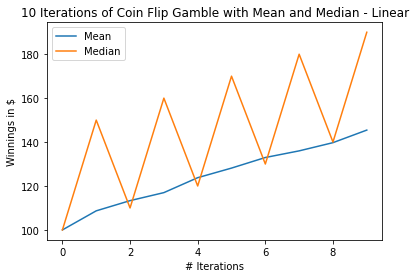

The results are different from the previous logic such that the mean carries an upward trend vs a downards trend. Similarly, the median follows the mean and will fluctuate around the mean, i.e. upward trend.


In [87]:
col2avg = n_rand.mean(axis = 1)
col2med = n_rand.median(axis = 1)
#plotting with linear y axis
data_10 = pd.DataFrame({'Mean': col2avg, 'Median': col2med})
data_10.plot()
plt.xlabel("# Iterations")
plt.ylabel("Winnings in $")
plt.title("10 Iterations of Coin Flip Gamble with Mean and Median - Linear")
plt.legend()
plt.show()
print("The results are different from the previous logic such that the mean carries an upward trend vs a downards trend. Similarly, the median follows the mean and will fluctuate around the mean, i.e. upward trend.")